In [1]:
import sim
import util
import pandas as pd
import time
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

testdf = util.Distributions.Uniform(32)
temp = sim.evaluate(testdf,steps=0,dt=1/64,solver=1)

In [2]:
ns = np.arange(start=1,stop=100,step=10)**2 * 128
nsteps = 0

saves = []
copys = []
executes = []

for n in tqdm(ns):
    df = util.Distributions.Plummer(n)
    out,stats = sim.evaluate(df,steps=nsteps,dt=1/64,solver=0)
    saves.append(stats["total_save_time"])
    copys.append(stats["total_copy_time"])
    executes.append(stats["total_eval_time"])

100%|██████████| 10/10 [01:36<00:00,  9.62s/it]


In [6]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

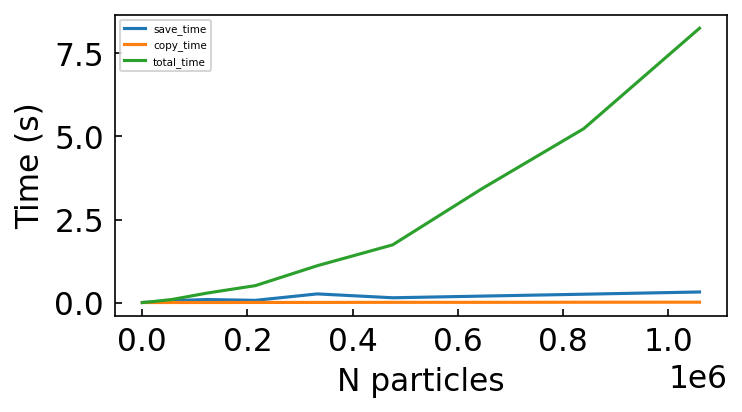

In [7]:
plt.plot(ns,saves,label="save_time")
plt.plot(ns,copys,label="copy_time")
plt.plot(ns,executes,label="total_time")
plt.legend()
plt.xlabel('N particles')
plt.ylabel("Time (s)")
plt.tight_layout()
plt.savefig("copytime_vs_executiontime.jpg")
plt.show()

In [5]:
print(np.array(copys)/np.array(executes))

[0.07103682 0.01214414 0.00991663 0.00460373 0.00427591 0.00312019
 0.00366963 0.00174081 0.00173965 0.00131882]
